In [29]:
%reload_ext autoreload
%autoreload 2

In [30]:
from network import *
from config import *
from plot import *
from analyse import *
import pickle
from tqdm.notebook import tqdm

### Uniform Network


In [5]:
uniform_network = CorticalNetwork(equation, N_exc, N_inh, V, taus, mus, J_uniform, P_uniform, is_cluster=False)
state_monitor_uniform_network, spike_monitor_uniform_network, spike_train_uniform_network = uniform_network.run_network(duration, N_realizations, N_trials)

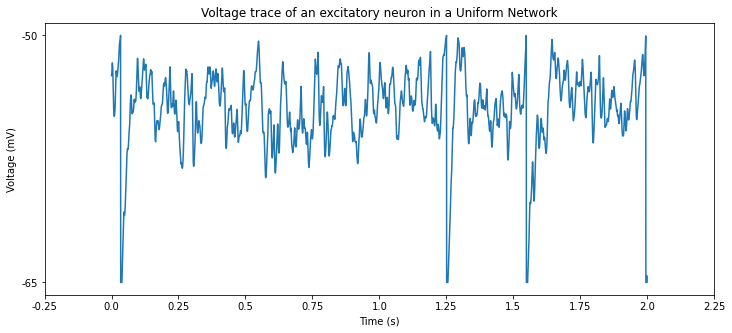

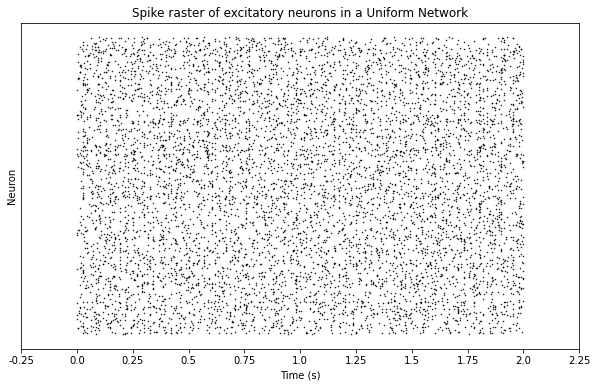

In [6]:
voltage_trace_plot(state_monitor_uniform_network, 1, network_type='Uniform')
spike_raster_plot(spike_monitor_uniform_network, 1, network_type='Uniform')

### Clustered Network

In [7]:
cluster_network = CorticalNetwork(equation, N_exc, N_inh, V, taus, mus, J_cluster, P_cluster, N_cluster=N_cluster, is_cluster=True)
state_monitor_cluster_network, spike_monitor_cluster_network, spike_train_cluster_network = cluster_network.run_network(duration, N_realizations, N_trials)

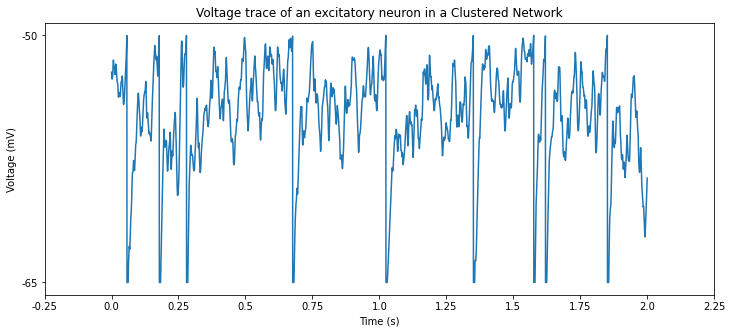

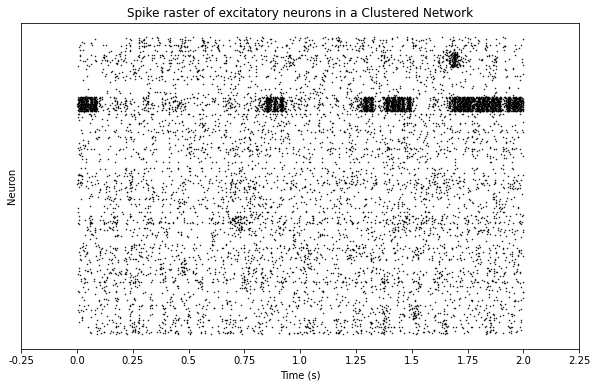

In [8]:
voltage_trace_plot(state_monitor_cluster_network, 1, network_type='Clustered')
spike_raster_plot(spike_monitor_cluster_network, 1, network_type='Clustered')

#the current rastor plot is for 4000 nnipeurons and hence pretty dense

### Storage


In [36]:
# dump
temp = open('spike_train_uniform_network.pkl', 'wb') 
pickle.dump(spike_train_uniform_network, temp) 
temp = open('spike_train_cluster_network.pkl', 'wb') 
pickle.dump(spike_train_cluster_network, temp)

In [146]:
# load
temp = open('./data/spike_train_uniform_network.pkl', 'rb') 
spike_train_uniform_network = pickle.load(temp)
temp = open('./data/spike_train_cluster_network.pkl', 'rb') 
spike_train_cluster_network = pickle.load(temp)



### Analysis


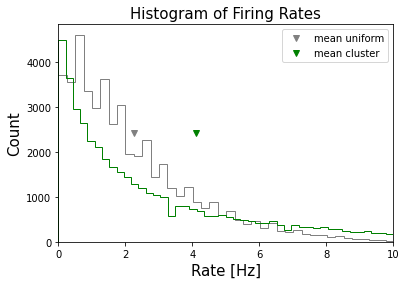

In [171]:
# firing rate histogram
after_duration=1.5*second

histogram_frate_uniform = get_flat_firing_rate(spike_train_uniform_network, after_duration, duration, N_trials, N_realizations, N_exc, network_type='uniform')
histogram_frate_cluster = get_flat_firing_rate(spike_train_cluster_network, after_duration, duration, N_trials, N_realizations, N_exc, network_type='uniform')
firing_rate_histogram_plot(histogram_frate_uniform, histogram_frate_cluster)

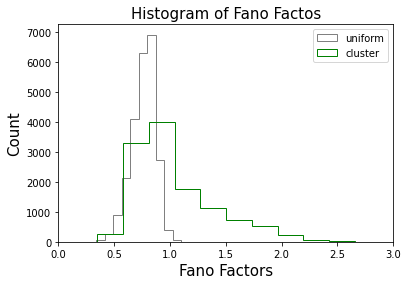

In [172]:
# fano factor histogram
fano_count_uniform = get_fano_factor(spike_train_uniform_network, after_duration, duration, N_trials, N_realizations, N_exc,  neuron_type='excitatory', network_type='uniform', window_size = 0.1 )
fano_count_cluster = get_fano_factor(spike_train_cluster_network, after_duration, duration, N_trials, N_realizations, N_exc,  neuron_type='excitatory', network_type='clustered', window_size = 0.1 )
fano_factor_histogram_plot(fano_count_uniform, fano_count_cluster)

# TODO: need to firgure bin size or sth out to get the correct y-range

In [ ]:
# fano factor over windows
window, fano_diff_uniform = get_fano_factor_windows(spike_train_uniform_network, after_duration, duration, N_trials, N_realizations, N_exc,  neuron_type='excitatory', network_type='uniform')
window, fano_diff_cluster = get_fano_factor_windows(spike_train_cluster_network, after_duration, duration, N_trials, N_realizations, N_exc,  neuron_type='excitatory', network_type='cluster')
fano_factor_windows_plot(window, fano_diff_uniform, fano_diff_cluster)

### Fano-Factors over R_ee

In [7]:
# fano factor over R_EE
fano_Ree = []
for r_ee in tqdm(np.linspace(1,4,13), desc = "R_EE"):
    P_cluster_Ree = P_cluster.copy()
    P_cluster_Ree['p_EE'] = calculate_p_EE(r_ee, P_uniform['p_EE'], N_exc, N_cluster)
    cluster_network_fano_Ree = CorticalNetwork(equation, N_exc, N_inh, V, taus, mus, J_cluster, P_cluster_Ree, N_cluster=N_cluster, is_cluster=True)
    state_monitor_cluster_network, spike_monitor_cluster_network, spike_train_cluster_network = cluster_network_fano_Ree.run_network(duration, N_realizations=N_realizations_Ree, N_trials=N_trials_Ree)
    with open("spike_train_uniform_network_REE_" + str(r_ee) +".pkl", 'wb') as f:
        pickle.dump(spike_train_cluster_network, f)
    fano_Ree.append(get_fano_factor(spike_train_cluster_network, after_duration, duration, N_trials=N_trials_Ree, N_realizations=N_realizations_Ree, N_exc=N_exc,  neuron_type='excitatory', network_type='clustered', window_size = 0.1))

R_EE:   0%|          | 0/13 [00:00<?, ?it/s]

Realization:   0%|          | 0/1 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Realization:   0%|          | 0/1 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Realization:   0%|          | 0/1 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Realization:   0%|          | 0/1 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Realization:   0%|          | 0/1 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Realization:   0%|          | 0/1 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Realization:   0%|          | 0/1 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Realization:   0%|          | 0/1 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Realization:   0%|          | 0/1 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Realization:   0%|          | 0/1 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Realization:   0%|          | 0/1 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Realization:   0%|          | 0/1 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Realization:   0%|          | 0/1 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

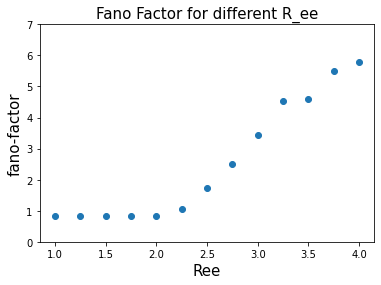

In [8]:
fano_Ree_avg = np.nanmean(fano_Ree, axis = 1)
fano_factor_over_ree_plot(fano_Ree_avg, np.linspace(1,4,13))

### Effect of Stimulation

In [12]:
cluster_network_stim = CorticalNetwork(equation, N_exc, N_inh, V, taus, mus, J_cluster, P_cluster, N_cluster=N_cluster, is_cluster=True)
state_monitor_cluster_network_stim, spike_monitor_cluster_network_stim, spike_train_cluster_network_stim = cluster_network_stim.multi_run_network(2.5*second, 400*ms, 1*second, mu_increase,N_cluster*5, N_realizations, N_trials)

Realization:   0%|          | 0/12 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

Trial:   0%|          | 0/9 [00:00<?, ?it/s]

In [65]:
with open("spike_train_stim.pkl", "wb") as f:
    pickle.dump(spike_train_cluster_network_stim, f)

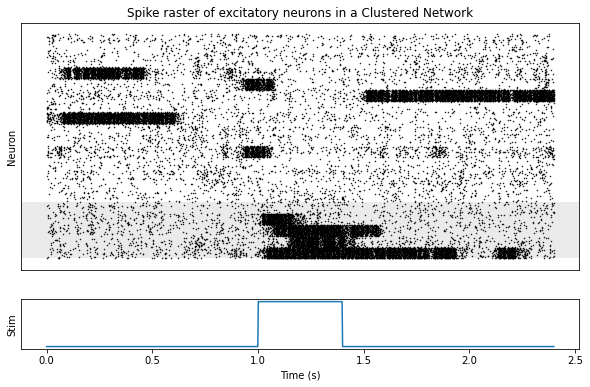

In [66]:
spike_raster_plot(spike_monitor_cluster_network_stim, after_duration, network_type='Clustered', grey = 5*N_cluster,stim_begin=1*second,stim_end=1.4*second)

In [ ]:
with open("data/spike_train_stim.pkl", "rb") as f:
    spike_train_cluster_network_stim = pickle.load(f)

In [54]:
fano_factor_stim_all = get_fano_factor_over_time      (spike_train_cluster_network_stim, 1.5*second, 3.9*second, N_cluster,   9, 12, N_exc)
fano_factor_stim_cluster = get_fano_factor_over_time  (spike_train_cluster_network_stim, 1.5*second, 3.9*second, 5,           9, 12, 5*N_cluster, end_before = 5*N_cluster)
fano_factor_stim_nocluster = get_fano_factor_over_time(spike_train_cluster_network_stim, 1.5*second, 3.9*second, N_cluster-5, 9, 12, N_exc-5*N_cluster, begin_after = 5*N_cluster)

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

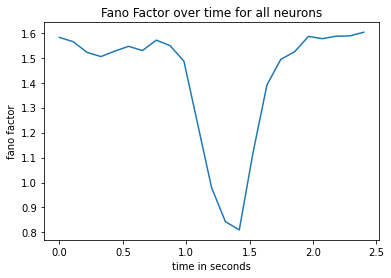

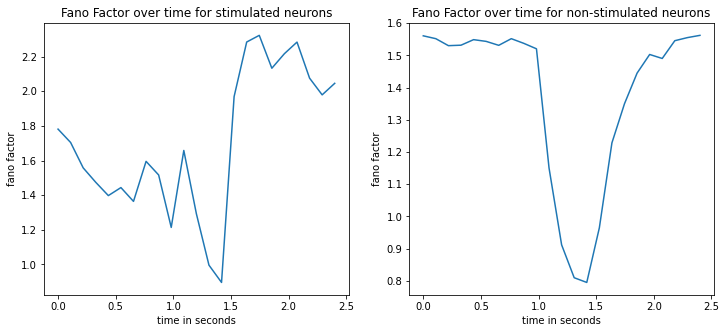

In [64]:
fano_factor_over_time_plot(fano_factor_stim_all, fano_factor_stim_cluster, fano_factor_stim_nocluster)